In [1]:
#importação das Bibliotecas a serem utilizadas:
import pandas as pd
import matplotlib.pyplot as plt

Leitura e preparação dos dados:

In [2]:
#Leitura do arquivo:
arq1=pd.read_csv('idesp.csv', sep=';', encoding = 'latin-1')
#Os valores do arquivo são separados por ',' por isso vamos substiruir por ponto'.' 
arq1=arq1.replace({',':'.'},regex=True)
#Algumas colunas não estão com o formato float, vamos corrigir:
arq1[['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']] = arq1[['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']].astype(float)
arq1.head()

,CODIGO CIE,CODIGO INEP,DIRETORIA,ESCOLA,MUNICIPIO,NIVEL ENSINO,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,12,35000012.0,NORTE 1,AYRES DE MOURA PROFESSOR ...,SAO PAULO,ENSINO MEDIO,1.37,1.86,1.75,1.92,2.36,1.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24,35000024.0,NORTE 1,GAVIAO PEIXOTO BRIGADEIRO ...,SAO PAULO,ENSINO MEDIO,1.32,1.59,1.32,1.58,1.24,1.37,1.16,1.36,NaN,1.83,1.19,1.95,1.44
2,36,35000036.0,NORTE 1,JOAO SOLIMEO ...,SAO PAULO,ENSINO MEDIO,1.07,0.82,1.61,1.40,1.37,1.61,1.13,1.74,1.88,1.26,1.60,1.90,1.50
3,48,35000048.0,NORTE 1,WALFREDO ARANTES CALDAS PROFESSOR ...,SAO PAULO,ENSINO MEDIO,0.93,1.24,1.50,1.29,1.24,1.00,1.26,1.18,1.11,1.43,1.56,1.73,1.12
4,59,35000059.0,NORTE 1,SEBASTIAO DE OLIVEIRA GUSMAO PROFESSOR ...,SAO PAULO,ENSINO MEDIO,1.08,1.06,1.63,1.25,1.53,1.09,1.12,1.31,1.21,1.63,1.29,2.03,1.70


Municipios que possuem maior nota no IDESP

In [3]:
#Vamos criar um novo dataframe com os municipios e as notas do idesp deles 
df_municipios = arq1[['MUNICIPIO','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']]
#Vamos agrupar os dados por municipio, e calcular a média desses de cada ano de todas as escolas do municipio
df_municipios=df_municipios.groupby(['MUNICIPIO'],as_index=False).mean()
#Definindo a coluna de municipio como indice:
df_municipios.set_index('MUNICIPIO', inplace=True)
#Criando uma nova coluna que vai incluir o valor médio considerando todos os anos:
df_municipios['Media']=df_municipios.mean(axis=1)
#Os municipior serão ordenados da maior média para a menor:
df_municipios=df_municipios.sort_values(by='Media', ascending=False)
#Apenas os 5 primeiros municipios serão deixados no dataframe:
df_municipios=df_municipios.head()

df_municipios.head()





,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Media
MUNICIPIO,,,,,,,,,,,,,,
PIRAJUI,2.275,2.430,2.600,2.500,2.205,3.665,4.055,3.845,5.760,5.48,6.455,4.365,5.94,3.967308
SANTA CRUZ DA ESPERANCA,1.400,1.640,1.260,3.750,2.010,5.220,6.060,6.100,4.630,5.73,4.110,3.900,2.66,3.728462
ARIRANHA,2.330,2.730,2.930,2.790,3.800,2.350,4.700,4.540,3.860,3.79,5.140,4.680,4.59,3.710000
FARTURA,2.140,3.425,3.645,3.665,3.250,4.200,3.595,3.655,4.245,4.20,3.665,3.955,4.27,3.685385
AVAI,1.370,1.470,2.510,4.810,4.810,4.180,5.610,4.370,4.250,4.34,4.120,2.320,3.24,3.646154


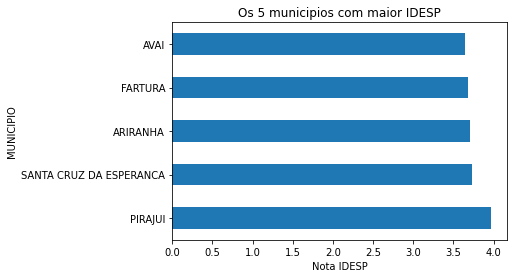

In [4]:
#Um gráfico de barras será criado apresentando os dados da média desses 5 Municipios com maior IDESP

df_municipios['Media'].plot(kind='barh')
plt.xlabel('Nota IDESP')
plt.title("Os 5 municipios com maior IDESP")
plt.show()

Municipios com mais dados

In [5]:
#Vamos pegar o arquivo inicial, agrupar por municipio contando o número de escolas, ordenar os valores e pegar o 5 primeiros números
top5_numeros=arq1.groupby('MUNICIPIO')['ESCOLA'].count().sort_values(ascending=False).head()
top5_numeros.head()

MUNICIPIO
SAO PAULO                637
GUARULHOS                108
CAMPINAS                 101
SAO BERNARDO DO CAMPO     65
SOROCABA                  61
Name: ESCOLA, dtype: int64

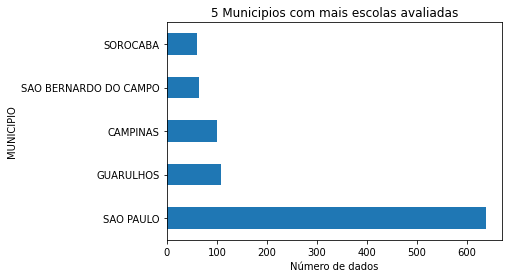

In [6]:
#Grafico dos municipios com mais escolas participantes:

top5_numeros.plot(kind='barh')
plt.xlabel('Número de dados')
plt.title("5 Municipios com mais escolas avaliadas")
plt.show()

Distribuição do idesp para a cidade de São Paulo, conforme a região

In [14]:
#Selecionando dados apenas da cidade de São Paulo, que é a cidade com mais escolas na base de dados
df_dist=arq1.loc[arq1['MUNICIPIO']=='SAO PAULO']
#Selecionando algumas colunas, agrupando por diretoria e invertendo o lado das colunas 
df_dist=df_dist[['DIRETORIA','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']].groupby(['DIRETORIA'],as_index=True).mean().transpose()
df_dist.head()

DIRETORIA,CENTRO,CENTRO OESTE,CENTRO SUL,LESTE 1,LESTE 2,LESTE 3,LESTE 4,LESTE 5,NORTE 1,NORTE 2,SUL 1,SUL 2,SUL 3
2007,1.550909,1.655405,1.473333,1.174783,0.958727,0.861087,1.099302,1.459211,1.144259,1.088889,1.0654,1.037170,1.017344
2008,1.801515,2.290263,1.821176,1.494667,1.227455,1.144783,1.419773,1.992368,1.359444,1.718333,1.4544,1.478889,1.584062
2009,2.002424,2.221053,1.793824,1.610698,1.466000,1.302553,1.560455,1.983158,1.554821,1.784167,1.5202,1.421071,1.585692
2010,1.776061,1.945946,1.718857,1.351591,1.270536,1.193542,1.389545,1.822368,1.359643,1.794444,1.4014,1.342982,1.418333
2011,1.836970,1.999189,1.646111,1.415000,1.233750,1.200400,1.443864,1.797368,1.361786,1.552368,1.3230,1.256610,1.420769


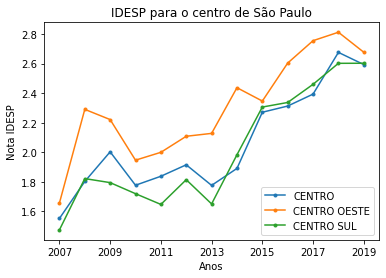

In [15]:
#centro

plt.plot(df_dist['CENTRO'], ".-", label="CENTRO")
plt.plot(df_dist['CENTRO OESTE'], ".-", label="CENTRO OESTE")
plt.plot(df_dist['CENTRO SUL'], ".-", label="CENTRO SUL")

plt.title('IDESP para o centro de São Paulo')
plt.xlabel('Anos')
plt.ylabel('Nota IDESP')
plt.legend(loc="lower right")

plt.xticks(["2007","2009","2011","2013","2015","2017","2019"])
plt.show()

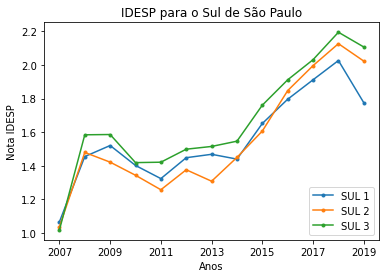

In [17]:
#Sul

plt.plot(df_dist['SUL 1'], ".-", label="SUL 1")
plt.plot(df_dist['SUL 2'], ".-", label="SUL 2")
plt.plot(df_dist['SUL 3'], ".-", label="SUL 3")


plt.title('IDESP para o Sul de São Paulo')
plt.xlabel('Anos')
plt.ylabel('Nota IDESP')
plt.legend(loc="lower right")
plt.xticks(["2007","2009","2011","2013","2015","2017","2019"])
plt.show()

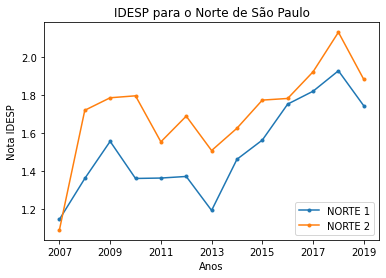

In [18]:
#Norte

plt.plot(df_dist['NORTE 1'], ".-", label="NORTE 1")
plt.plot(df_dist['NORTE 2'], ".-", label="NORTE 2")


plt.title('IDESP para o Norte de São Paulo')
plt.xlabel('Anos')
plt.ylabel('Nota IDESP')
plt.legend(loc="lower right")
plt.xticks(["2007","2009","2011","2013","2015","2017","2019"])
plt.show()

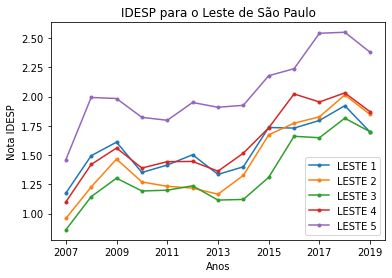

In [19]:
#Leste

plt.plot(df_dist['LESTE 1'], ".-", label="LESTE 1")
plt.plot(df_dist['LESTE 2'], ".-", label="LESTE 2")
plt.plot(df_dist['LESTE 3'], ".-", label="LESTE 3")
plt.plot(df_dist['LESTE 4'], ".-", label="LESTE 4")
plt.plot(df_dist['LESTE 5'], ".-", label="LESTE 5")

plt.title('IDESP para o Leste de São Paulo')
plt.xlabel('Anos')
plt.ylabel('Nota IDESP')
plt.legend(loc="lower right")
plt.xticks(["2007","2009","2011","2013","2015","2017","2019"])
plt.show()